<a href="https://colab.research.google.com/github/megmkoch/IceJamProjectFall2022/blob/main/2018_2019_IceJamProjectFall2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas
!pip install libpysal
!pip install rasterio
!pip install earthpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.6 MB/s 
     |████████████████████████████████| 6.3 MB 22.7 MB/s 
     |████████████████████████████████| 16.7 MB 24.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.4 MB 5.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.3 MB 1.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 4.7 MB/s 


In [2]:
import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import rasterio as rio
from rasterio.plot import plotting_extent
import earthpy as et
import earthpy.plot as ep

In [3]:
import urllib.request

#define online filepath (aka url)
#Dec21-Jan02
jan022019_url = 'https://d3gm2hf49xd6jj.cloudfront.net/83b2b4f5-a27f-4223-b09b-bbd32380b3e8/S1AA_20181221T225128_20190102T225128_VVP012_INT80_G_ueF_34B2.zip'

#define local filepath
jan022019_filepath = 'S1AA_20181221T225128_20190102T225128_VVP012_INT80_G_ueF_34B2.zip'

#download data
urllib.request.urlretrieve(jan022019_url, jan022019_filepath)

#unzip file 
!unzip S1AA_20181221T225128_20190102T225128_VVP012_INT80_G_ueF_34B2.zip


Archive:  S1AA_20181221T225128_20190102T225128_VVP012_INT80_G_ueF_34B2.zip
   creating: S1AA_20181221T225128_20190102T225128_VVP012_INT80_G_ueF_34B2/
  inflating: S1AA_20181221T225128_20190102T225128_VVP012_INT80_G_ueF_34B2/S1AA_20181221T225128_20190102T225128_VVP012_INT80_G_ueF_34B2_color_phase.png  
  inflating: S1AA_20181221T225128_20190102T225128_VVP012_INT80_G_ueF_34B2/S1AA_20181221T225128_20190102T225128_VVP012_INT80_G_ueF_34B2_amp.tif  
  inflating: S1AA_20181221T225128_20190102T225128_VVP012_INT80_G_ueF_34B2/S1AA_20181221T225128_20190102T225128_VVP012_INT80_G_ueF_34B2_wrapped_phase.tif.xml  
  inflating: S1AA_20181221T225128_20190102T225128_VVP012_INT80_G_ueF_34B2/S1AA_20181221T225128_20190102T225128_VVP012_INT80_G_ueF_34B2_corr.tif  
  inflating: S1AA_20181221T225128_20190102T225128_VVP012_INT80_G_ueF_34B2/S1AA_20181221T225128_20190102T225128_VVP012_INT80_G_ueF_34B2_amp.tif.xml  
  inflating: S1AA_20181221T225128_20190102T225128_VVP012_INT80_G_ueF_34B2/S1AA_20181221T225128_201

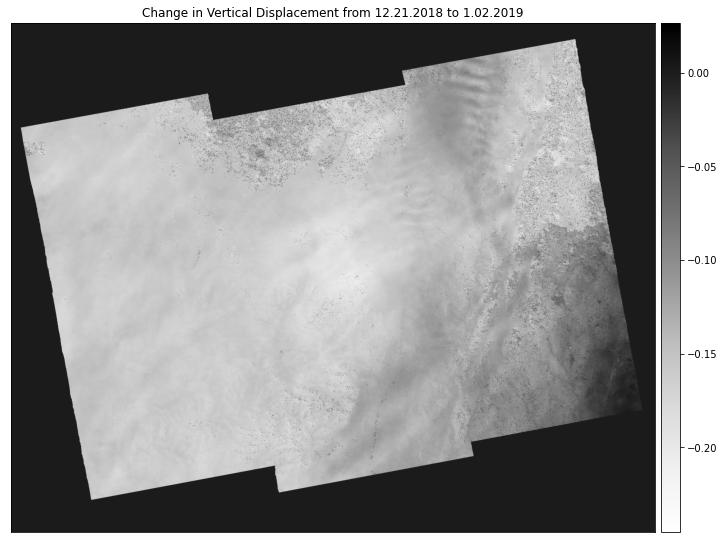

In [4]:
# open and plot vertical displacement map
with rio.open('S1AA_20181221T225128_20190102T225128_VVP012_INT80_G_ueF_34B2/S1AA_20181221T225128_20190102T225128_VVP012_INT80_G_ueF_34B2_vert_disp.tif') as vert_disp_src:
    jan022019 = vert_disp_src.read(1)

ep.plot_bands(jan022019,
              title="Change in Vertical Displacement from 12.21.2018 to 1.02.2019",
              cmap="Greys")

plt.show()

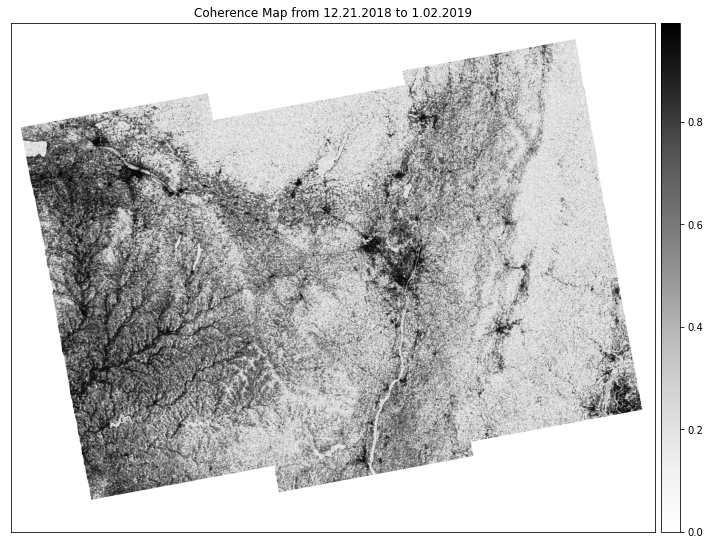

In [5]:
with rio.open('S1AA_20181221T225128_20190102T225128_VVP012_INT80_G_ueF_34B2/S1AA_20181221T225128_20190102T225128_VVP012_INT80_G_ueF_34B2_corr.tif') as coherence_src:
    jan022019_corr = coherence_src.read(1)

ep.plot_bands(jan022019_corr,
              title="Coherence Map from 12.21.2018 to 1.02.2019",
              cmap="Greys")

plt.show()

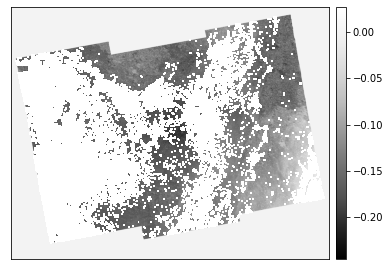

In [7]:
# masking the vertical displacement array (jan022019) by using coherence array (jan022019_corr) where condition coherence array >0.8 is true
jan022019_mask = np.ma.masked_where(jan022019_corr > 0.8, jan022019)
  
# plot vertical displacement array masked by coherence
fig, ax = plt.subplots(figsize=(6,6))
ep.plot_bands(jan022019_mask,
               ax=ax,
               scale=False)
plt.show()

In [8]:
#define online filepath (aka url)
#Jan02-Jan14
jan142019_url = 'https://d3gm2hf49xd6jj.cloudfront.net/293b5930-f62b-499c-8e57-7ac6c9af80be/S1AA_20190102T225128_20190114T225127_VVP012_INT80_G_ueF_3B5C.zip'

#define local filepath
jan142019_filepath = 'S1AA_20190102T225128_20190114T225127_VVP012_INT80_G_ueF_3B5C.zip'

#download data
urllib.request.urlretrieve(jan142019_url, jan142019_filepath)

#unzip file 
!unzip S1AA_20190102T225128_20190114T225127_VVP012_INT80_G_ueF_3B5C.zip

Archive:  S1AA_20190102T225128_20190114T225127_VVP012_INT80_G_ueF_3B5C.zip
   creating: S1AA_20190102T225128_20190114T225127_VVP012_INT80_G_ueF_3B5C/
  inflating: S1AA_20190102T225128_20190114T225127_VVP012_INT80_G_ueF_3B5C/S1AA_20190102T225128_20190114T225127_VVP012_INT80_G_ueF_3B5C_amp.tif  
  inflating: S1AA_20190102T225128_20190114T225127_VVP012_INT80_G_ueF_3B5C/S1AA_20190102T225128_20190114T225127_VVP012_INT80_G_ueF_3B5C_wrapped_phase.tif.xml  
  inflating: S1AA_20190102T225128_20190114T225127_VVP012_INT80_G_ueF_3B5C/S1AA_20190102T225128_20190114T225127_VVP012_INT80_G_ueF_3B5C_dem.tif  
  inflating: S1AA_20190102T225128_20190114T225127_VVP012_INT80_G_ueF_3B5C/S1AA_20190102T225128_20190114T225127_VVP012_INT80_G_ueF_3B5C_unw_phase.kmz  
  inflating: S1AA_20190102T225128_20190114T225127_VVP012_INT80_G_ueF_3B5C/S1AA_20190102T225128_20190114T225127_VVP012_INT80_G_ueF_3B5C.txt  
  inflating: S1AA_20190102T225128_20190114T225127_VVP012_INT80_G_ueF_3B5C/S1AA_20190102T225128_20190114T22512

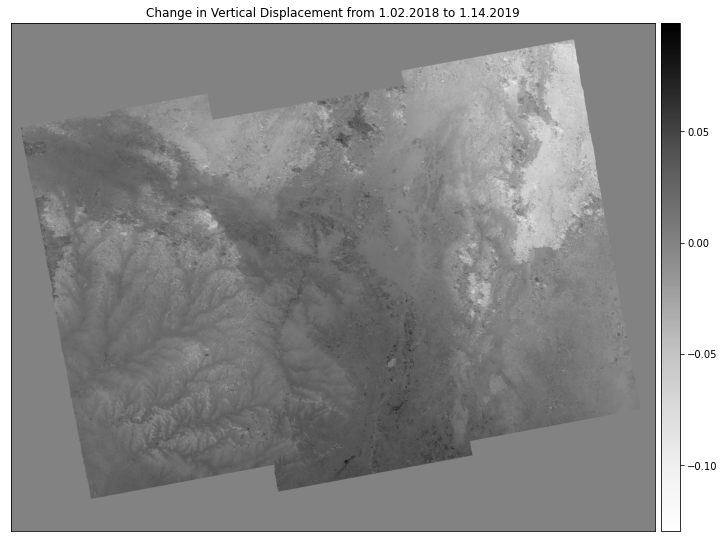

In [9]:
# open and plot vertical displacement map
with rio.open('S1AA_20190102T225128_20190114T225127_VVP012_INT80_G_ueF_3B5C/S1AA_20190102T225128_20190114T225127_VVP012_INT80_G_ueF_3B5C_vert_disp.tif') as vert_disp_src:
    jan142019 = vert_disp_src.read(1)

ep.plot_bands(jan142019,
              title="Change in Vertical Displacement from 1.02.2018 to 1.14.2019",
              cmap="Greys")

plt.show()

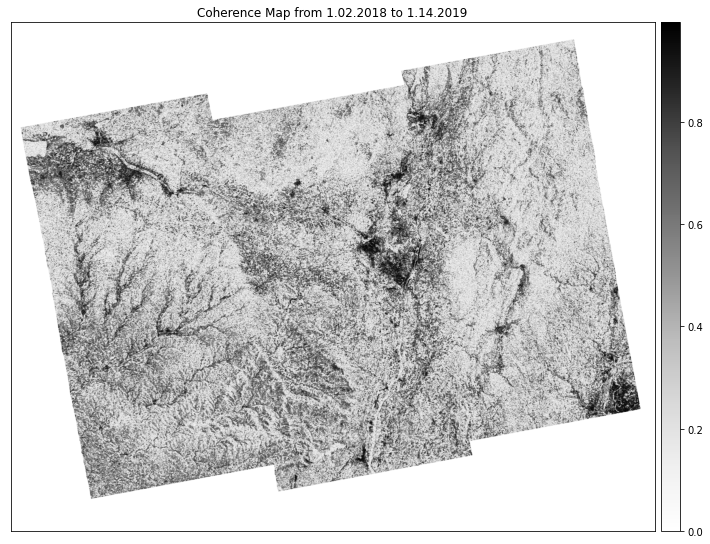

In [10]:
with rio.open('S1AA_20190102T225128_20190114T225127_VVP012_INT80_G_ueF_3B5C/S1AA_20190102T225128_20190114T225127_VVP012_INT80_G_ueF_3B5C_corr.tif') as coherence_src:
    jan142019_corr = coherence_src.read(1)

ep.plot_bands(jan142019_corr,
              title="Coherence Map from 1.02.2018 to 1.14.2019",
              cmap="Greys")

plt.show()

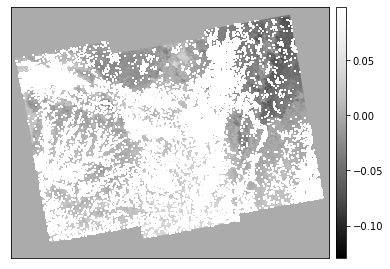

In [11]:
# masking the vertical displacement array (jan142019) by using coherence array (jan142019_corr) where condition coherence array >0.8 is true
jan142019_mask = np.ma.masked_where(jan142019_corr > 0.8, jan142019)
  
# plot vertical displacement array masked by coherence
fig, ax = plt.subplots(figsize=(6,6))
ep.plot_bands(jan142019_mask,
               ax=ax,
               scale=False)
plt.show()

In [12]:
#define online filepath (aka url)
#Jan14-Jan26
jan262019_url = 'https://d3gm2hf49xd6jj.cloudfront.net/464bd779-adb3-4547-bd10-76d0a5feb693/S1AA_20190114T225127_20190126T225127_VVP012_INT80_G_ueF_21B7.zip'

#define local filepath
jan262019_filepath = 'S1AA_20190114T225127_20190126T225127_VVP012_INT80_G_ueF_21B7.zip'

#download data
urllib.request.urlretrieve(jan262019_url, jan262019_filepath)

#unzip file 
!unzip S1AA_20190114T225127_20190126T225127_VVP012_INT80_G_ueF_21B7.zip

Archive:  S1AA_20190114T225127_20190126T225127_VVP012_INT80_G_ueF_21B7.zip
   creating: S1AA_20190114T225127_20190126T225127_VVP012_INT80_G_ueF_21B7/
  inflating: S1AA_20190114T225127_20190126T225127_VVP012_INT80_G_ueF_21B7/S1AA_20190114T225127_20190126T225127_VVP012_INT80_G_ueF_21B7_water_mask.tif.xml  
  inflating: S1AA_20190114T225127_20190126T225127_VVP012_INT80_G_ueF_21B7/S1AA_20190114T225127_20190126T225127_VVP012_INT80_G_ueF_21B7_color_phase.png.xml  
  inflating: S1AA_20190114T225127_20190126T225127_VVP012_INT80_G_ueF_21B7/S1AA_20190114T225127_20190126T225127_VVP012_INT80_G_ueF_21B7_unw_phase.png.aux.xml  
  inflating: S1AA_20190114T225127_20190126T225127_VVP012_INT80_G_ueF_21B7/S1AA_20190114T225127_20190126T225127_VVP012_INT80_G_ueF_21B7_vert_disp.tif.xml  
  inflating: S1AA_20190114T225127_20190126T225127_VVP012_INT80_G_ueF_21B7/S1AA_20190114T225127_20190126T225127_VVP012_INT80_G_ueF_21B7_dem.tif  
  inflating: S1AA_20190114T225127_20190126T225127_VVP012_INT80_G_ueF_21B7/S1AA

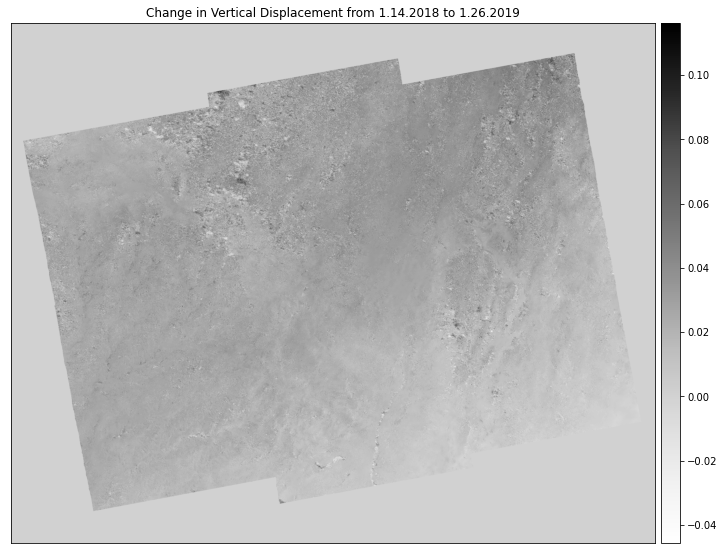

In [13]:
# open and plot vertical displacement map
with rio.open('S1AA_20190114T225127_20190126T225127_VVP012_INT80_G_ueF_21B7/S1AA_20190114T225127_20190126T225127_VVP012_INT80_G_ueF_21B7_vert_disp.tif') as vert_disp_src:
    jan262019 = vert_disp_src.read(1)

ep.plot_bands(jan262019,
              title="Change in Vertical Displacement from 1.14.2018 to 1.26.2019",
              cmap="Greys")

plt.show()

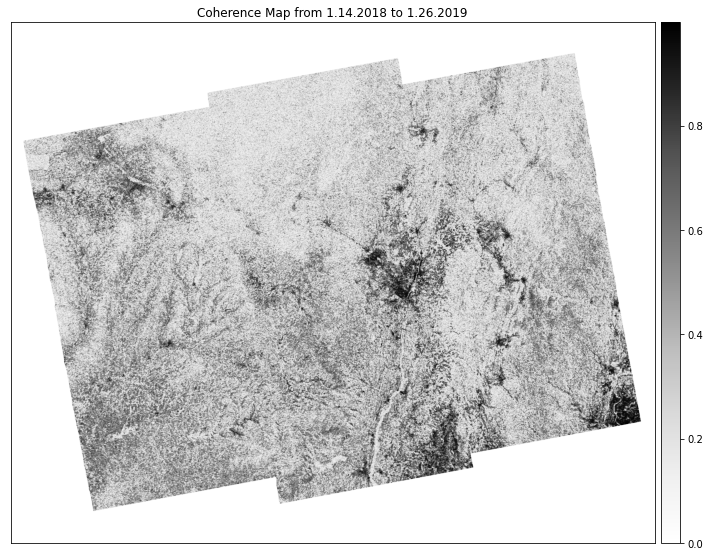

In [14]:
with rio.open('S1AA_20190114T225127_20190126T225127_VVP012_INT80_G_ueF_21B7/S1AA_20190114T225127_20190126T225127_VVP012_INT80_G_ueF_21B7_corr.tif') as coherence_src:
    jan262019_corr = coherence_src.read(1)

ep.plot_bands(jan262019_corr,
              title="Coherence Map from 1.14.2018 to 1.26.2019",
              cmap="Greys")

plt.show()

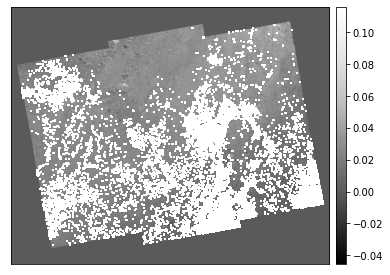

In [15]:
# masking the vertical displacement array (jan262019) by using coherence array (jan262019_corr) where condition coherence array >0.8 is true
jan262019_mask = np.ma.masked_where(jan262019_corr > 0.8, jan262019)
  
# plot vertical displacement array masked by coherence
fig, ax = plt.subplots(figsize=(6,6))
ep.plot_bands(jan262019_mask,
               ax=ax,
               scale=False)
plt.show()

In [16]:
#define online filepath (aka url)
#Jan26-Feb07
feb072019_url = 'https://d3gm2hf49xd6jj.cloudfront.net/437bbcd6-8457-417e-b773-9adfb6853f73/S1AA_20190126T225127_20190207T225126_VVP012_INT80_G_ueF_393C.zip'

#define local filepath
feb072019_filepath = 'S1AA_20190126T225127_20190207T225126_VVP012_INT80_G_ueF_393C.zip'

#download data
urllib.request.urlretrieve(feb072019_url, feb072019_filepath)

#unzip file 
!unzip S1AA_20190126T225127_20190207T225126_VVP012_INT80_G_ueF_393C.zip

Archive:  S1AA_20190126T225127_20190207T225126_VVP012_INT80_G_ueF_393C.zip
   creating: S1AA_20190126T225127_20190207T225126_VVP012_INT80_G_ueF_393C/
  inflating: S1AA_20190126T225127_20190207T225126_VVP012_INT80_G_ueF_393C/S1AA_20190126T225127_20190207T225126_VVP012_INT80_G_ueF_393C_los_disp.tif.xml  
  inflating: S1AA_20190126T225127_20190207T225126_VVP012_INT80_G_ueF_393C/S1AA_20190126T225127_20190207T225126_VVP012_INT80_G_ueF_393C_amp.tif.xml  
  inflating: S1AA_20190126T225127_20190207T225126_VVP012_INT80_G_ueF_393C/S1AA_20190126T225127_20190207T225126_VVP012_INT80_G_ueF_393C_dem.tif.xml  
  inflating: S1AA_20190126T225127_20190207T225126_VVP012_INT80_G_ueF_393C/S1AA_20190126T225127_20190207T225126_VVP012_INT80_G_ueF_393C.txt  
  inflating: S1AA_20190126T225127_20190207T225126_VVP012_INT80_G_ueF_393C/S1AA_20190126T225127_20190207T225126_VVP012_INT80_G_ueF_393C_unw_phase.png.xml  
  inflating: S1AA_20190126T225127_20190207T225126_VVP012_INT80_G_ueF_393C/S1AA_20190126T225127_2019020

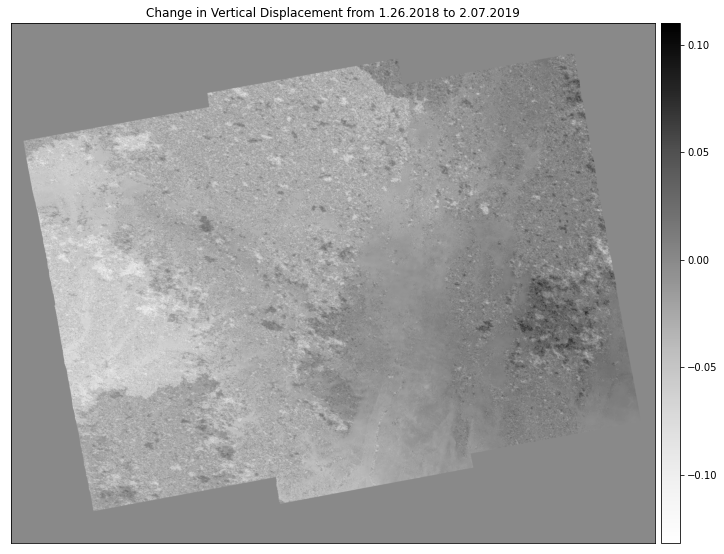

In [17]:
# open and plot vertical displacement map
with rio.open('S1AA_20190126T225127_20190207T225126_VVP012_INT80_G_ueF_393C/S1AA_20190126T225127_20190207T225126_VVP012_INT80_G_ueF_393C_vert_disp.tif') as vert_disp_src:
    feb072019 = vert_disp_src.read(1)

ep.plot_bands(feb072019,
              title="Change in Vertical Displacement from 1.26.2018 to 2.07.2019",
              cmap="Greys")

plt.show()

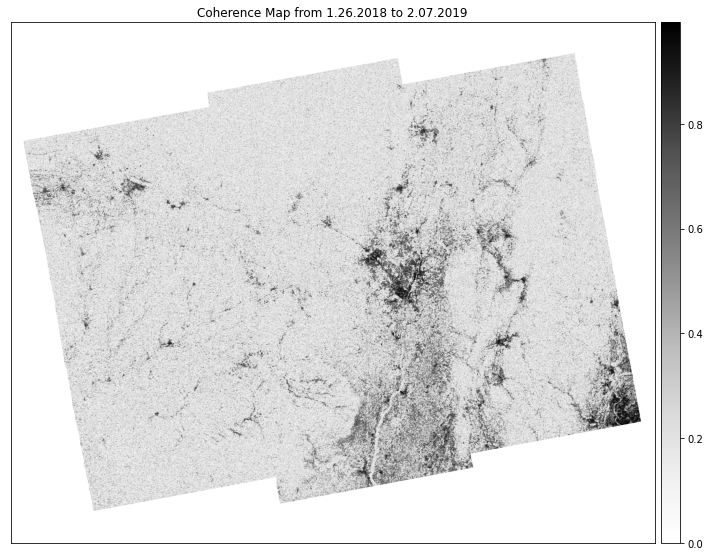

In [18]:
with rio.open('S1AA_20190126T225127_20190207T225126_VVP012_INT80_G_ueF_393C/S1AA_20190126T225127_20190207T225126_VVP012_INT80_G_ueF_393C_corr.tif') as coherence_src:
    feb072019_corr = coherence_src.read(1)

ep.plot_bands(feb072019_corr,
              title="Coherence Map from 1.26.2018 to 2.07.2019",
              cmap="Greys")

plt.show()

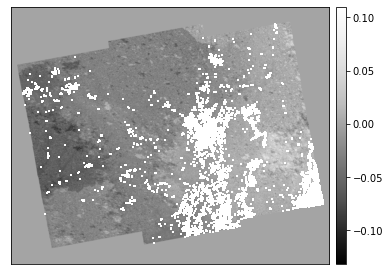

In [19]:
# masking the vertical displacement array (feb072019) by using coherence array (feb072019_corr) where condition coherence array >0.8 is true
feb072019_mask = np.ma.masked_where(feb072019_corr > 0.8, feb072019)
  
# plot vertical displacement array masked by coherence
fig, ax = plt.subplots(figsize=(6,6))
ep.plot_bands(feb072019_mask,
               ax=ax,
               scale=False)
plt.show()

In [20]:
#define online filepath (aka url)
#Feb07-Feb19
feb192019_url = 'https://d3gm2hf49xd6jj.cloudfront.net/c4134f17-4daa-4657-ba33-64fb8ff4c82e/S1AA_20190207T225126_20190219T225126_VVP012_INT80_G_ueF_EE4F.zip'

#define local filepath
feb192019_filepath = 'S1AA_20190207T225126_20190219T225126_VVP012_INT80_G_ueF_EE4F.zip'

#download data
urllib.request.urlretrieve(feb192019_url, feb192019_filepath)

#unzip file 
!unzip S1AA_20190207T225126_20190219T225126_VVP012_INT80_G_ueF_EE4F.zip

Archive:  S1AA_20190207T225126_20190219T225126_VVP012_INT80_G_ueF_EE4F.zip
   creating: S1AA_20190207T225126_20190219T225126_VVP012_INT80_G_ueF_EE4F/
  inflating: S1AA_20190207T225126_20190219T225126_VVP012_INT80_G_ueF_EE4F/S1AA_20190207T225126_20190219T225126_VVP012_INT80_G_ueF_EE4F_los_disp.tif  
  inflating: S1AA_20190207T225126_20190219T225126_VVP012_INT80_G_ueF_EE4F/S1AA_20190207T225126_20190219T225126_VVP012_INT80_G_ueF_EE4F_amp.tif  
  inflating: S1AA_20190207T225126_20190219T225126_VVP012_INT80_G_ueF_EE4F/S1AA_20190207T225126_20190219T225126_VVP012_INT80_G_ueF_EE4F_unw_phase.png  
  inflating: S1AA_20190207T225126_20190219T225126_VVP012_INT80_G_ueF_EE4F/S1AA_20190207T225126_20190219T225126_VVP012_INT80_G_ueF_EE4F_wrapped_phase.tif.xml  
  inflating: S1AA_20190207T225126_20190219T225126_VVP012_INT80_G_ueF_EE4F/S1AA_20190207T225126_20190219T225126_VVP012_INT80_G_ueF_EE4F_unw_phase.png.xml  
  inflating: S1AA_20190207T225126_20190219T225126_VVP012_INT80_G_ueF_EE4F/S1AA_20190207T22

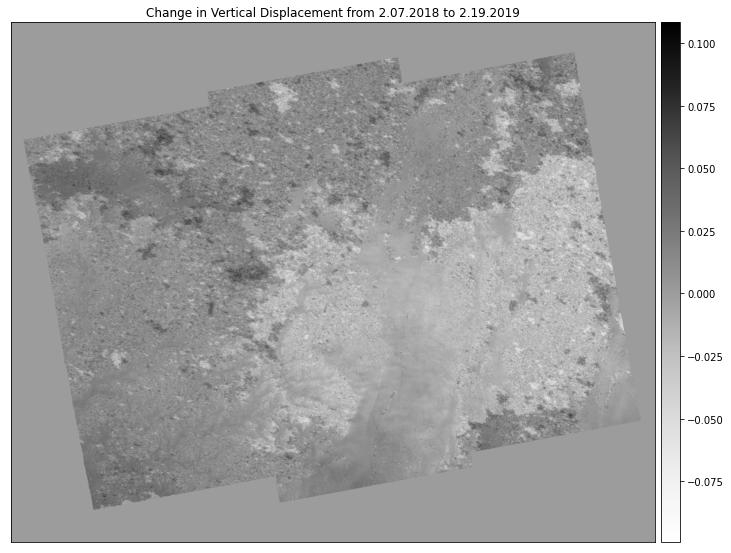

In [21]:
# open and plot vertical displacement map
with rio.open('S1AA_20190207T225126_20190219T225126_VVP012_INT80_G_ueF_EE4F/S1AA_20190207T225126_20190219T225126_VVP012_INT80_G_ueF_EE4F_vert_disp.tif') as vert_disp_src:
    feb192019 = vert_disp_src.read(1)

ep.plot_bands(feb192019,
              title="Change in Vertical Displacement from 2.07.2018 to 2.19.2019",
              cmap="Greys")

plt.show()

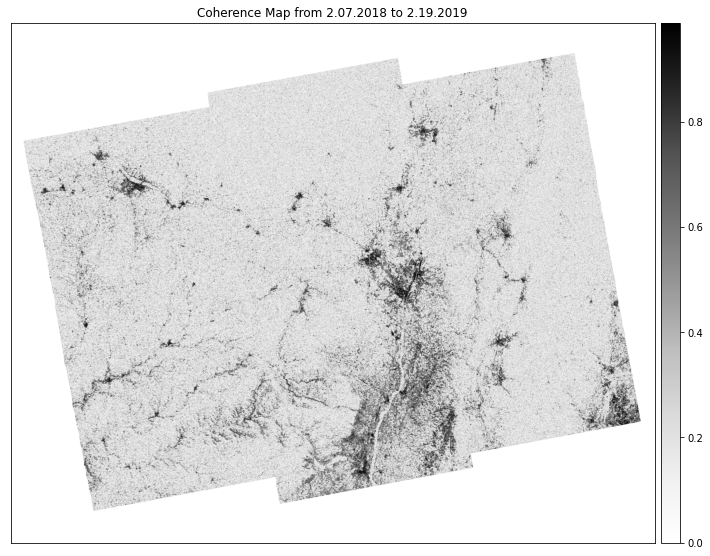

In [22]:
with rio.open('S1AA_20190207T225126_20190219T225126_VVP012_INT80_G_ueF_EE4F/S1AA_20190207T225126_20190219T225126_VVP012_INT80_G_ueF_EE4F_corr.tif') as coherence_src:
    feb192019_corr = coherence_src.read(1)

ep.plot_bands(feb192019_corr,
              title="Coherence Map from 2.07.2018 to 2.19.2019",
              cmap="Greys")

plt.show()

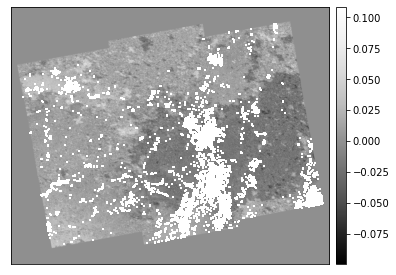

In [24]:
# masking the vertical displacement array (feb192019) by using coherence array (feb192019_corr) where condition coherence array >0.8 is true
feb192019_mask = np.ma.masked_where(feb192019_corr > 0.8, feb192019)
  
# plot vertical displacement array masked by coherence
fig, ax = plt.subplots(figsize=(6,6))
ep.plot_bands(feb192019_mask,
               ax=ax,
               scale=False)
plt.show()

In [25]:
#define online filepath (aka url)
#Feb19-Mar03
mar032019_url = 'https://d3gm2hf49xd6jj.cloudfront.net/4a12623d-fd80-4436-90fd-b21ad070261d/S1AA_20190219T225126_20190303T225126_VVP012_INT80_G_ueF_3C62.zip'

#define local filepath
mar032019_filepath = 'S1AA_20190219T225126_20190303T225126_VVP012_INT80_G_ueF_3C62.zip'

#download data
urllib.request.urlretrieve(mar032019_url, mar032019_filepath)

#unzip file 
!unzip S1AA_20190219T225126_20190303T225126_VVP012_INT80_G_ueF_3C62.zip

Archive:  S1AA_20190219T225126_20190303T225126_VVP012_INT80_G_ueF_3C62.zip
   creating: S1AA_20190219T225126_20190303T225126_VVP012_INT80_G_ueF_3C62/
  inflating: S1AA_20190219T225126_20190303T225126_VVP012_INT80_G_ueF_3C62/S1AA_20190219T225126_20190303T225126_VVP012_INT80_G_ueF_3C62_color_phase.png.xml  
  inflating: S1AA_20190219T225126_20190303T225126_VVP012_INT80_G_ueF_3C62/S1AA_20190219T225126_20190303T225126_VVP012_INT80_G_ueF_3C62_vert_disp.tif  
  inflating: S1AA_20190219T225126_20190303T225126_VVP012_INT80_G_ueF_3C62/S1AA_20190219T225126_20190303T225126_VVP012_INT80_G_ueF_3C62_wrapped_phase.tif  
  inflating: S1AA_20190219T225126_20190303T225126_VVP012_INT80_G_ueF_3C62/S1AA_20190219T225126_20190303T225126_VVP012_INT80_G_ueF_3C62_unw_phase.png  
  inflating: S1AA_20190219T225126_20190303T225126_VVP012_INT80_G_ueF_3C62/S1AA_20190219T225126_20190303T225126_VVP012_INT80_G_ueF_3C62_unw_phase.png.aux.xml  
  inflating: S1AA_20190219T225126_20190303T225126_VVP012_INT80_G_ueF_3C62/S1A

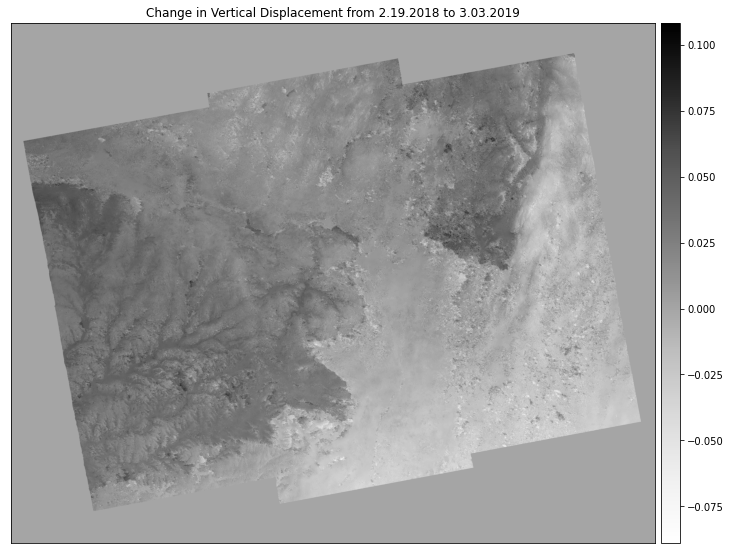

In [26]:
# open and plot vertical displacement map
with rio.open('S1AA_20190219T225126_20190303T225126_VVP012_INT80_G_ueF_3C62/S1AA_20190219T225126_20190303T225126_VVP012_INT80_G_ueF_3C62_vert_disp.tif') as vert_disp_src:
    mar032019 = vert_disp_src.read(1)

ep.plot_bands(mar032019,
              title="Change in Vertical Displacement from 2.19.2018 to 3.03.2019",
              cmap="Greys")

plt.show()

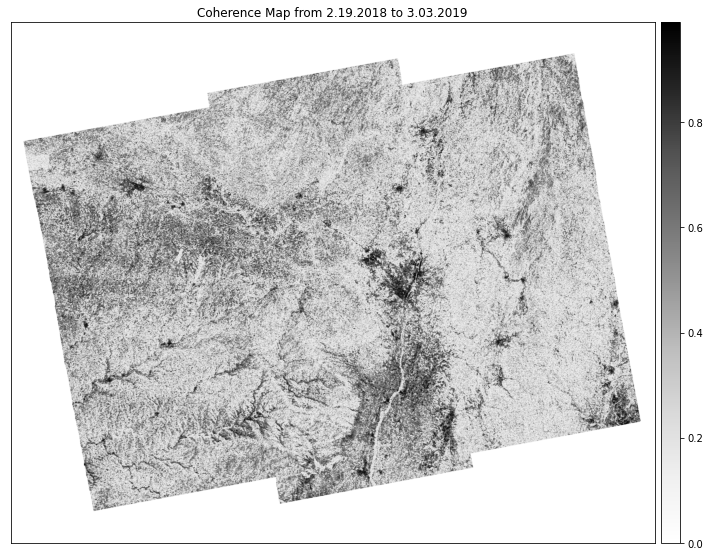

In [27]:
with rio.open('S1AA_20190219T225126_20190303T225126_VVP012_INT80_G_ueF_3C62/S1AA_20190219T225126_20190303T225126_VVP012_INT80_G_ueF_3C62_corr.tif') as coherence_src:
    mar032019_corr = coherence_src.read(1)

ep.plot_bands(mar032019_corr,
              title="Coherence Map from 2.19.2018 to 3.03.2019",
              cmap="Greys")

plt.show()

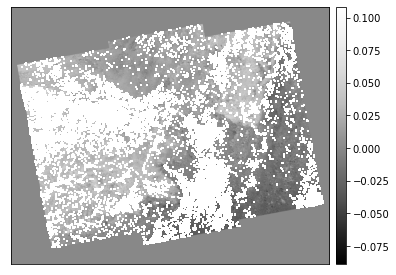

In [28]:
# masking the vertical displacement array (mar032019) by using coherence array (mar032019_corr) where condition coherence array >0.8 is true
mar032019_mask = np.ma.masked_where(mar032019_corr > 0.8, mar032019)
  
# plot vertical displacement array masked by coherence
fig, ax = plt.subplots(figsize=(6,6))
ep.plot_bands(mar032019_mask,
               ax=ax,
               scale=False)
plt.show()

In [29]:
#define online filepath (aka url)
#Mar03-Mar15
mar152019_url = 'https://d3gm2hf49xd6jj.cloudfront.net/823a519d-99e8-400f-8fed-1fbf5b1cfda1/S1AA_20190303T225126_20190315T225126_VVP012_INT80_G_ueF_3B7A.zip'

#define local filepath
mar152019_filepath = 'S1AA_20190303T225126_20190315T225126_VVP012_INT80_G_ueF_3B7A.zip'

#download data
urllib.request.urlretrieve(mar152019_url, mar152019_filepath)

#unzip file 
!unzip S1AA_20190303T225126_20190315T225126_VVP012_INT80_G_ueF_3B7A.zip

Archive:  S1AA_20190303T225126_20190315T225126_VVP012_INT80_G_ueF_3B7A.zip
   creating: S1AA_20190303T225126_20190315T225126_VVP012_INT80_G_ueF_3B7A/
  inflating: S1AA_20190303T225126_20190315T225126_VVP012_INT80_G_ueF_3B7A/S1AA_20190303T225126_20190315T225126_VVP012_INT80_G_ueF_3B7A_color_phase.png.xml  
  inflating: S1AA_20190303T225126_20190315T225126_VVP012_INT80_G_ueF_3B7A/S1AA_20190303T225126_20190315T225126_VVP012_INT80_G_ueF_3B7A_amp.tif.xml  
  inflating: S1AA_20190303T225126_20190315T225126_VVP012_INT80_G_ueF_3B7A/S1AA_20190303T225126_20190315T225126_VVP012_INT80_G_ueF_3B7A_los_disp.tif  
  inflating: S1AA_20190303T225126_20190315T225126_VVP012_INT80_G_ueF_3B7A/S1AA_20190303T225126_20190315T225126_VVP012_INT80_G_ueF_3B7A_unw_phase.kmz  
  inflating: S1AA_20190303T225126_20190315T225126_VVP012_INT80_G_ueF_3B7A/S1AA_20190303T225126_20190315T225126_VVP012_INT80_G_ueF_3B7A_unw_phase.png.aux.xml  
  inflating: S1AA_20190303T225126_20190315T225126_VVP012_INT80_G_ueF_3B7A/S1AA_20190

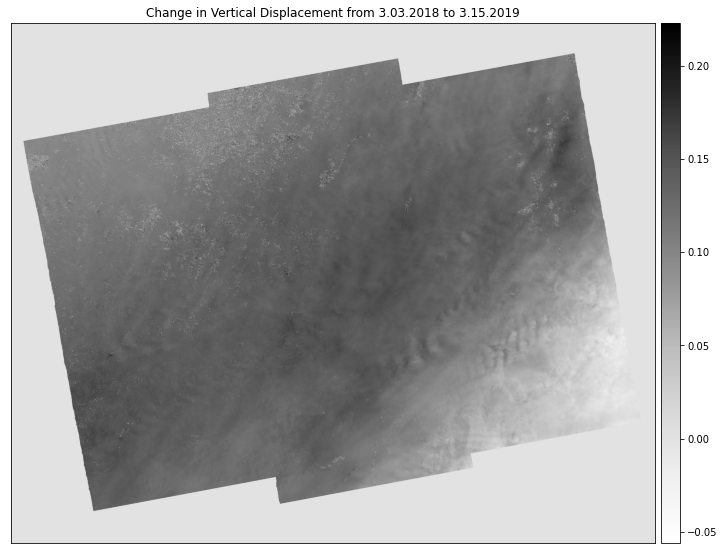

In [30]:
# open and plot vertical displacement map
with rio.open('S1AA_20190303T225126_20190315T225126_VVP012_INT80_G_ueF_3B7A/S1AA_20190303T225126_20190315T225126_VVP012_INT80_G_ueF_3B7A_vert_disp.tif') as vert_disp_src:
    mar152019 = vert_disp_src.read(1)

ep.plot_bands(mar152019,
              title="Change in Vertical Displacement from 3.03.2018 to 3.15.2019",
              cmap="Greys")

plt.show()

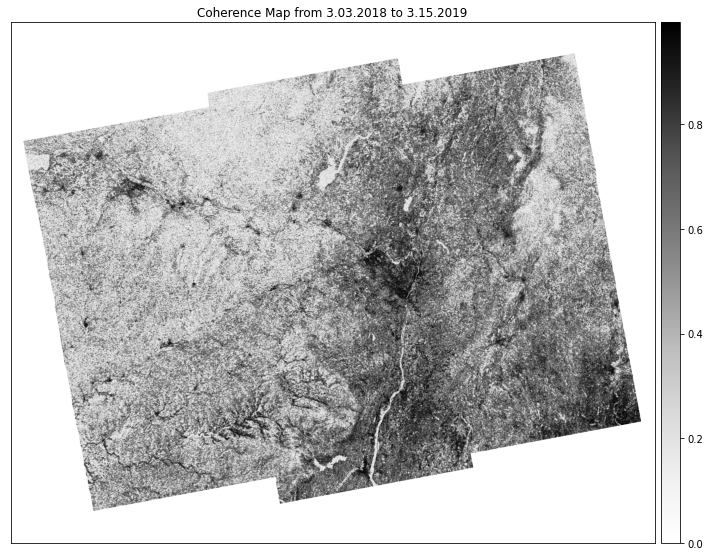

In [31]:
with rio.open('S1AA_20190303T225126_20190315T225126_VVP012_INT80_G_ueF_3B7A/S1AA_20190303T225126_20190315T225126_VVP012_INT80_G_ueF_3B7A_corr.tif') as coherence_src:
    mar152019_corr = coherence_src.read(1)

ep.plot_bands(mar152019_corr,
              title="Coherence Map from 3.03.2018 to 3.15.2019",
              cmap="Greys")

plt.show()

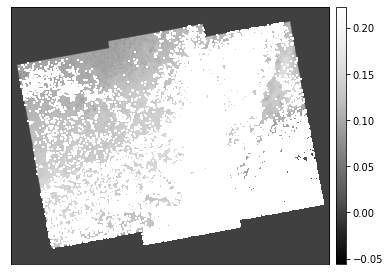

In [32]:
# masking the vertical displacement array (mar152019) by using coherence array (mar152019_corr) where condition coherence array >0.8 is true
mar152019_mask = np.ma.masked_where(mar152019_corr > 0.8, mar152019)
  
# plot vertical displacement array masked by coherence
fig, ax = plt.subplots(figsize=(6,6))
ep.plot_bands(mar152019_mask,
               ax=ax,
               scale=False)
plt.show()

In [33]:
#define online filepath (aka url)
#Mar15-Mar27
mar272019_url = 'https://d3gm2hf49xd6jj.cloudfront.net/832e6efb-3827-4d73-a56d-65b2d572b087/S1AA_20190315T225126_20190327T225127_VVP012_INT80_G_ueF_9BF2.zip'

#define local filepath
mar272019_filepath = 'S1AA_20190315T225126_20190327T225127_VVP012_INT80_G_ueF_9BF2.zip'

#download data
urllib.request.urlretrieve(mar272019_url, mar272019_filepath)

#unzip file 
!unzip S1AA_20190315T225126_20190327T225127_VVP012_INT80_G_ueF_9BF2.zip

Archive:  S1AA_20190315T225126_20190327T225127_VVP012_INT80_G_ueF_9BF2.zip
   creating: S1AA_20190315T225126_20190327T225127_VVP012_INT80_G_ueF_9BF2/
  inflating: S1AA_20190315T225126_20190327T225127_VVP012_INT80_G_ueF_9BF2/S1AA_20190315T225126_20190327T225127_VVP012_INT80_G_ueF_9BF2_corr.tif  
  inflating: S1AA_20190315T225126_20190327T225127_VVP012_INT80_G_ueF_9BF2/S1AA_20190315T225126_20190327T225127_VVP012_INT80_G_ueF_9BF2_los_disp.tif  
  inflating: S1AA_20190315T225126_20190327T225127_VVP012_INT80_G_ueF_9BF2/S1AA_20190315T225126_20190327T225127_VVP012_INT80_G_ueF_9BF2_color_phase.png.aux.xml  
  inflating: S1AA_20190315T225126_20190327T225127_VVP012_INT80_G_ueF_9BF2/S1AA_20190315T225126_20190327T225127_VVP012_INT80_G_ueF_9BF2_water_mask.tif.xml  
  inflating: S1AA_20190315T225126_20190327T225127_VVP012_INT80_G_ueF_9BF2/S1AA_20190315T225126_20190327T225127_VVP012_INT80_G_ueF_9BF2_water_mask.tif  
  inflating: S1AA_20190315T225126_20190327T225127_VVP012_INT80_G_ueF_9BF2/S1AA_201903

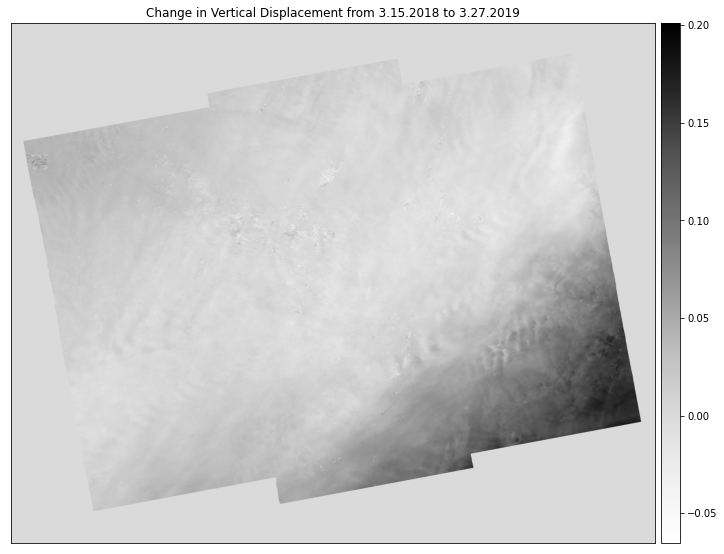

In [34]:
# open and plot vertical displacement map
with rio.open('S1AA_20190315T225126_20190327T225127_VVP012_INT80_G_ueF_9BF2/S1AA_20190315T225126_20190327T225127_VVP012_INT80_G_ueF_9BF2_vert_disp.tif') as vert_disp_src:
    mar272019 = vert_disp_src.read(1)

ep.plot_bands(mar272019,
              title="Change in Vertical Displacement from 3.15.2018 to 3.27.2019",
              cmap="Greys")

plt.show()

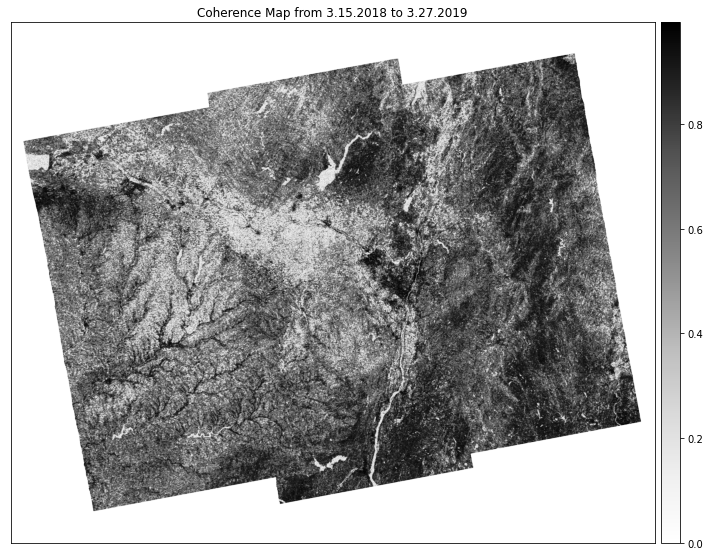

In [36]:
with rio.open('S1AA_20190315T225126_20190327T225127_VVP012_INT80_G_ueF_9BF2/S1AA_20190315T225126_20190327T225127_VVP012_INT80_G_ueF_9BF2_corr.tif') as coherence_src:
    mar272019_corr = coherence_src.read(1)

ep.plot_bands(mar272019_corr,
              title="Coherence Map from 3.15.2018 to 3.27.2019",
              cmap="Greys")

plt.show()

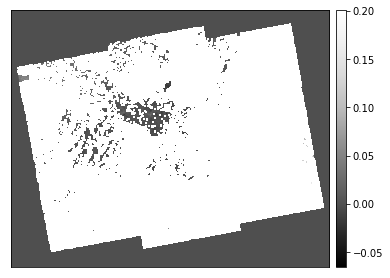

In [37]:
# masking the vertical displacement array (mar272019) by using coherence array (mar272019_corr) where condition coherence array >0.8 is true
mar272019_mask = np.ma.masked_where(mar272019_corr > 0.8, mar272019)
  
# plot vertical displacement array masked by coherence
fig, ax = plt.subplots(figsize=(6,6))
ep.plot_bands(mar272019_mask,
               ax=ax,
               scale=False)
plt.show()